# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [19]:
import pandas as pd
import numpy as np

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

#Plotting
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

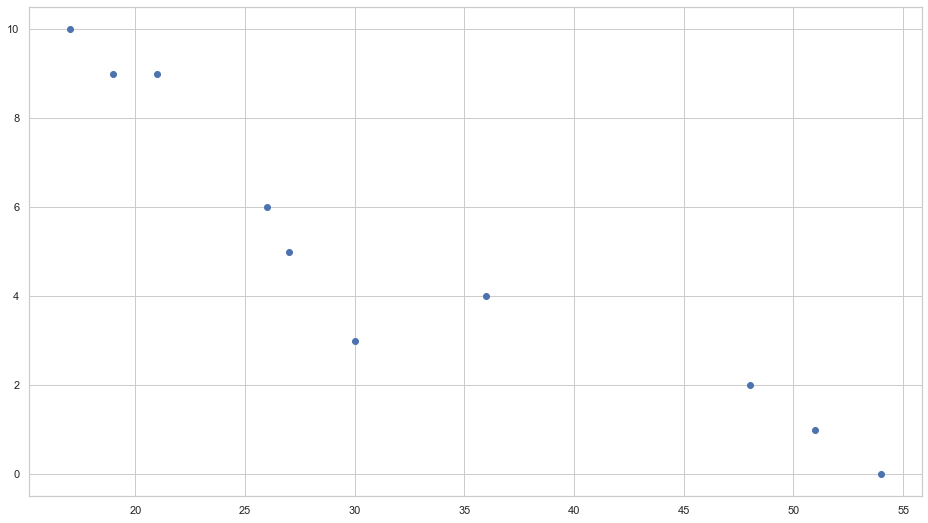

In [20]:
plt.scatter(student_data["Age"], student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [21]:
# Yes, it looks like the older the student is, the less tardies they have.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
corr = np.corrcoef(student_data["Age"], student_data["Tardies"])[0, 1]
print("Correlation coefficient:", corr)
cov = np.cov(student_data["Age"], student_data["Tardies"])[0, 1]
print("Covariance:", cov)

# Both messure the relationship between two variables but correlations is standarized and thus it makes it easier to compare bewtween variables of different scales.

Correlation coefficient: -0.9391626886887122
Covariance: -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()

In [24]:
results.summary()

/opt/miniconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        15:42:57   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# This gives us the full model, since we are using a linear model the result is a straight line plotted at the intersect on the y axis at (12.88).
# The slope of the model is the coeficient of our only independent variable, Age. And it is equal to -0.2428.
# This results in a line of the equation Y = -0.2428 X + 12.88 where Y is the number of Tardies and X is the Age.

Plot your regression model on your scatter plot.

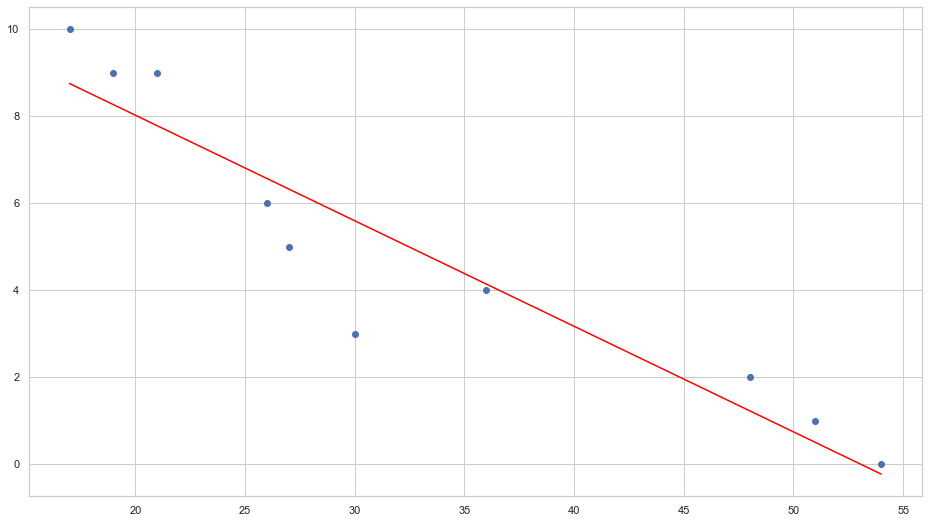

In [26]:
# Define the equation
m = -0.2428
b = 12.88

# Generate the line data from the equation
x_model = np.linspace(min(student_data["Age"]), max(student_data["Age"]), 100)
y_model = m * x_model + b

# Our original plot
plt.scatter(student_data["Age"], student_data["Tardies"])

# Add the line to the plot
plt.plot(x_model, y_model, color='red');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
# From the summary displayed before we can see that the model has an adjusted R Squared value of 0.867. It is a high R-Squared value but we have seen higher.
# Meaning that even though the Age of the student is a good predictor for the number of Tardies, it only responds to 88% of the variance, there is still 13.3% left to be explained by other variables not considered in our study.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [49]:
vehicles.cov();

In [50]:
# Looking at the correlation values (since it provides a standarized value) at the column 'CO2 Emission Grams/Mile' (as it is the variable we are trying to predict) we can inferr:
# Variable with the most useful information: 'Fuel Barrels / Year' since it is the highest correlated variableo to 'CO2 Emission Grams/Mile'
# Variable with the least useful information: 'Year' since it is the lowest correlated variableo to 'CO2 Emission Grams/Mile'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [51]:
# To avoid sintax erros with the model building, we will rename columns to eliminate spaces.
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [52]:
vehicles = vehicles.rename(columns={'Engine Displacement': 'Engine_Displacement', 'Vehicle Class': 'Vehicle_Class', 'Fuel Type': 'Fuel_Type', 'Fuel Barrels/Year': 'Fuel_Barrels_per_Year', 'City MPG':'City_MPG', 'Highway MPG' : 'Highway_MPG', 'Combined MPG' : 'Combined_MPG', 'CO2 Emission Grams/Mile':'CO2_Emission_Grams_per_Mile', 'Fuel Cost/Year' : 'Fuel_Cost_per_Year'})
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine_Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle_Class', 'Fuel_Type',
       'Fuel_Barrels_per_Year', 'City_MPG', 'Highway_MPG', 'Combined_MPG',
       'CO2_Emission_Grams_per_Mile', 'Fuel_Cost_per_Year'],
      dtype='object')

In [54]:
# Now we build the model with the new column names.
model_2 = smf.ols("CO2_Emission_Grams_per_Mile ~ Year + Cylinders + Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year", data=vehicles).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [55]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.687e+05
Date:                         Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                                 16:07:21   Log-Likelihood:            -1.5173e+05
No. Observations:                        35952   AIC:                         3.035e+05
Df Residuals:                            35946   BIC:                         3.035e+05
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               769.8883     19.392     39.702      0.000     731.880     807.897
Year                     -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                 1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_per_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_per_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# The model has a very high adjusted R Squared value (0.981), meaning that the considered variables account for 98.1% of the variation of our dependent variable (CO2_Emission_Grams_per_Mile).
# All considered variables are significant since they all have small P values (They are all very close to 0.000).
# The variable with the highest influence in our dependent variable are: Fuel_Barrels_per_Year and Combined_MPG

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [58]:
party_data = pd.DataFrame({"X":[1,3,4,6,8,9,11,14], "Y":[1,2,4,4,5,7,8,13]})
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

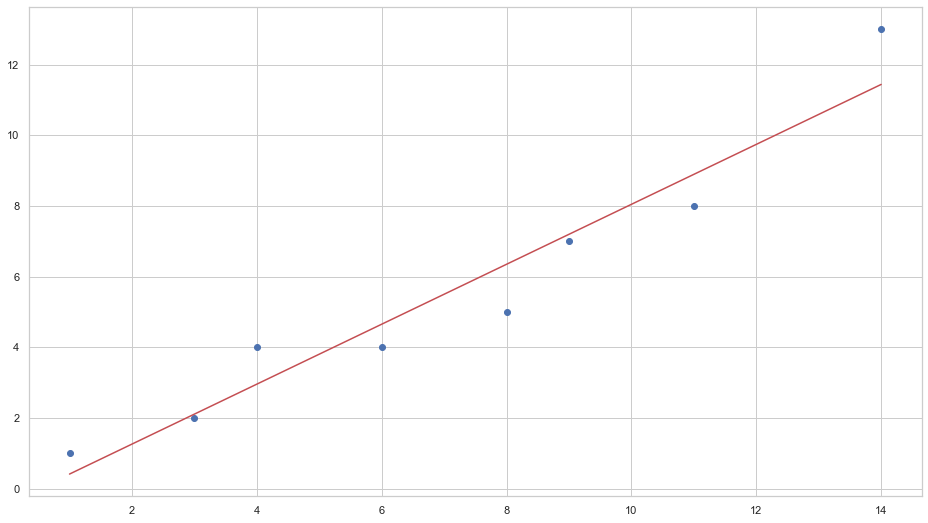

In [62]:
# Creating the linear regression model
lr = LinearRegression()
lr.fit(X=party_data[["X"]], y=party_data["Y"])

# Create the line using the X points and the Y by the prediction model
model = lr.coef_[0]*party_data["X"] + lr.intercept_

# Plotting the data in a scatter plot
plt.scatter(party_data["X"], party_data["Y"])

# Adding the regression line to the plot.
plt.plot(party_data["X"], model, label="Regression", color="r");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# It looks like the line follows the trend described by the data and the errors do not look too significant. Looks like you might be on to something.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

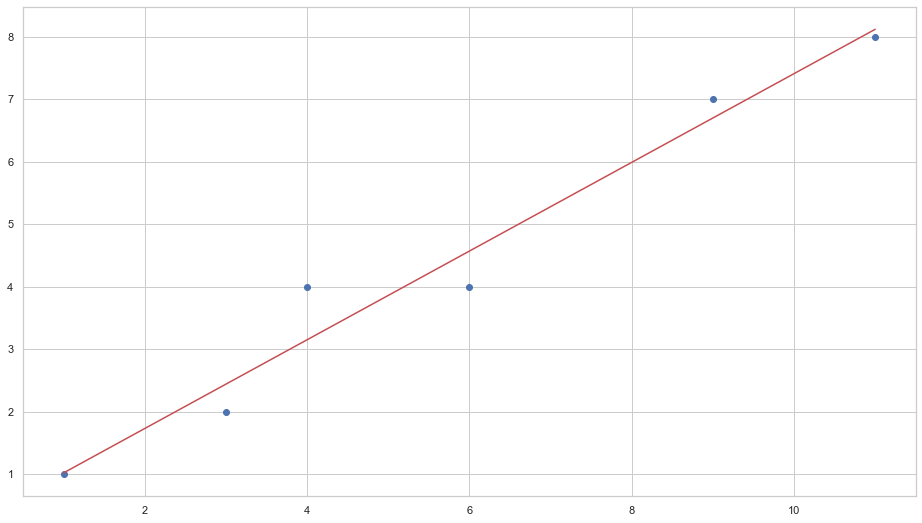

In [65]:
# Not really, the biggest errors looks to be on the x values for 14 and 8 but they dont look too out of place. But lets drop these lines and re do the process.

party_data_2 = party_data
party_data_2.drop(index=[4, 7], inplace=True)

# Creating the linear regression model
lr_2 = LinearRegression()
lr_2.fit(X=party_data_2[["X"]], y=party_data_2["Y"])

# Create the line using the X points and the Y by the prediction model
model_3 = lr_2.coef_[0]*party_data_2["X"] + lr_2.intercept_

# Plotting the data in a scatter plot
plt.scatter(party_data_2["X"], party_data_2["Y"])

# Adding the regression line to the plot.
plt.plot(party_data_2["X"], model_3, label="Regression", color="r");

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [66]:
print(lr.coef_[0])
print(lr_2.coef_[0])

0.8484848484848485
0.7102803738317759


In [ ]:
# It looks the the coeficient dropped, this is only the inclination of the line, to see if the model is worse or better we would have to compare R-Squared values.